In [ ]:
from google.cloud import storage
from google.colab import drive
import torch
from torchvision import transforms
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
RAW_DATA_BUCKET_NAME="team-engai-dogs"
client = storage.Client.from_service_account_json('./secrets/data-service-account.json')
bucket = client.get_bucket(RAW_DATA_BUCKET_NAME)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
blob = bucket.blob('dog_age_dataset/PetFinder_All/PetFinder_All/Adult/12076859_2.jpg')


In [ ]:
blob.download_to_filename('test.jpg')


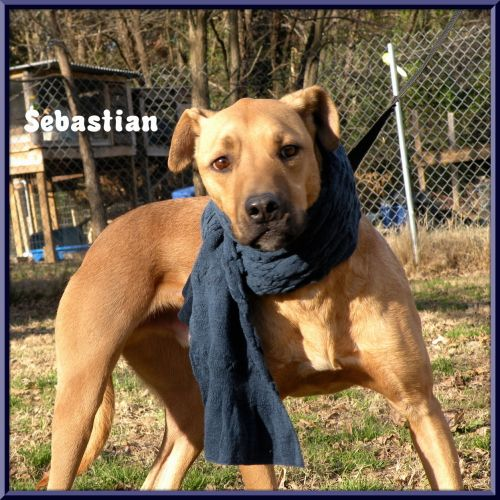

In [ ]:
image =Image.open('test.jpg')
display(image)

In [ ]:
convert_tensor = transforms.ToTensor()
image_tensor = convert_tensor(image)

In [ ]:
image_tensor = image_tensor.permute(1, 2, 0)

In [ ]:
image_tensor = image_tensor.unsqueeze(0)
image_tensor.shape

torch.Size([1, 500, 500, 3])

In [ ]:
image_tensors = tf.image.resize(
    image_tensor,
    [224, 224],
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
)


In [ ]:
transform = transforms.ToPILImage()

In [ ]:
image_torch_tensor = tf.convert_to_tensor(image_tensors[0], np.float32)

In [ ]:
image_torch_tensor

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.39117774, 0.40294245, 0.5685587 ],
        [0.31775555, 0.3255987 , 0.5171603 ],
        [0.33071354, 0.3365418 , 0.5410108 ],
        ...,
        [0.31934997, 0.31985924, 0.5238286 ],
        [0.33498853, 0.33106697, 0.50242543],
        [0.1981257 , 0.19420414, 0.35891   ]],

       [[0.505853  , 0.5098649 , 0.6648166 ],
        [0.39236352, 0.3962851 , 0.57667726],
        [0.30913526, 0.30913526, 0.50640416],
        ...,
        [0.31624305, 0.31956938, 0.5089951 ],
        [0.18850654, 0.18458498, 0.35594344],
        [0.00595759, 0.00536235, 0.15599081]],

       [[0.5057073 , 0.4981793 , 0.64233196],
        [0.4983159 , 0.4938119 , 0.6648075 ],
        [0.03577461, 0.02769231, 0.21843672],
        ...,
        [0.19823232, 0.20210326, 0.37460163],
        [0.01337204, 0.00945047, 0.17415635],
        [0.02730759, 0.02350701, 0.1880919 ]],

       ...,

       [[0.51448625, 0.5105647 , 0.6674275 ],
        [0.52

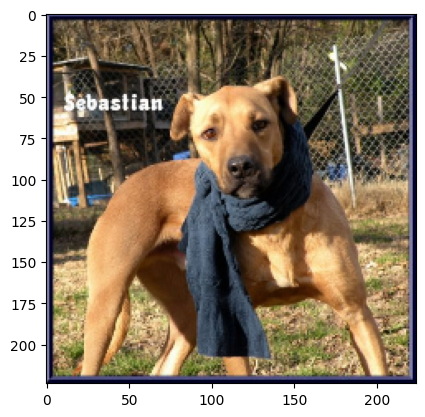

In [ ]:
plt.imshow(image_torch_tensor)

In [ ]:
image_torch_tensor.shape

TensorShape([224, 224, 3])

In [ ]:
img = tf.image.convert_image_dtype(image_torch_tensor, dtype=tf.uint8)

In [ ]:
import PIL
PIL.Image.fromarray(np.array(img)).save('test-resize.jpg')

In [ ]:
import tensorflow as tf

def create_example(image_bytes, label):
    # Create a dictionary with the image data and label
    feature = {
        'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_bytes])),
        'height':tf.train.Feature(int64_list=tf.train.Int64List(value=[224])),
        'width':tf.train.Feature(int64_list=tf.train.Int64List(value=[224])),
        'channel':tf.train.Feature(int64_list=tf.train.Int64List(value=[3])),
        'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[label]))
    }
    # Create an example proto
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    return example.SerializeToString()

In [ ]:
example = create_example(bytes(img), 10)

In [ ]:
# Create a TFRecordWriter object
writer = tf.io.TFRecordWriter('data.tfrecord')

In [ ]:
# Serialize the example and write it to the TFRecord file
writer.write(example)

# Close the TFRecordWriter
writer.close()

Multiple Image version

In [1]:
from google.cloud import storage
from google.colab import drive
import torch
from torchvision import transforms
from PIL import Image
import PIL
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import re
import io
import torchvision as tv

In [ ]:
RAW_AGE_NAME="team-engai-dogs"
RAW_AGE_PREF="dog_age_dataset/Expert_Train/Expert_TrainEval"
client = storage.Client.from_service_account_json('./secrets/data-service-account.json')
# bucket = client.get_bucket(RAW_DATA_BUCKET_NAME,prefix=RAW_BUCKET)
blobs_age = client.list_blobs(RAW_AGE_NAME, prefix=RAW_AGE_PREF)

PROC_AGE_NAME="team-engai-dogs-processed"
proc_age = client.get_bucket(PROC_AGE_NAME)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
blobs_age = list(blobs_age)

In [ ]:
for blob in blobs_age:
  try:
    if ".DS_Store" not in blob.name:
      if re.search(r"Adult",blob.name):
        print("Adult")
        label = "Adult"
      elif re.search(r"Senior",blob.name):
        print("Senior")
        label = "Senior"
      elif re.search(r"Young",blob.name):
        print("Young")
        label = "Young"
      if(not blob.name.endswith("/")):
        file_name = blob.name.split('/')[-1].split('.')[0] + "_" + label + ".jpg"
        # print(file_name)
        blob.download_to_filename(file_name)
        image = Image.open(file_name)
        convert_tensor = transforms.ToTensor()
        image_tensor = convert_tensor(image)
        image_tensor = image_tensor.permute(1, 2, 0)
        image_tensor = image_tensor.unsqueeze(0)
        image_tensors = tf.image.resize(image_tensor, [224, 224], method=tf.image.ResizeMethod.BILINEAR, preserve_aspect_ratio=False)
        img = tf.image.convert_image_dtype(image_tensors[0], dtype=tf.uint8)
        PIL.Image.fromarray(np.array(img)).save(file_name)
        destination_blob = proc_age.blob(blob.name)
        destination_blob.upload_from_filename(file_name)
  except:
    print("got exception" + blob.name)
    continue



Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adul

In [ ]:
img = tf.image.convert_image_dtype(image_tensors[0], dtype=tf.uint8)

In [3]:
RAW_BREED_NAME="team-engai-dogs"
RAW_BREED_PREF="dog_breed_dataset/images/Images"
client = storage.Client.from_service_account_json('./secrets/data-service-account.json')
# bucket = client.get_bucket(RAW_DATA_BUCKET_NAME,prefix=RAW_BUCKET)
blobs_breed = client.list_blobs(RAW_BREED_NAME, prefix=RAW_BREED_PREF)

PROC_BREED_NAME="team-engai-dogs-processed"
proc_breed = client.get_bucket(PROC_BREED_NAME)

In [4]:
blobs_breed = list(blobs_breed)

In [9]:
for blob in blobs_breed:
  if ".DS_Store" not in blob.name:
      if(not blob.name.endswith("/")):
        file_name = blob.name.split('/')[-1]
        blob.download_to_filename(file_name)
        image = Image.open(file_name)
        convert_tensor = transforms.ToTensor()
        image_tensor = convert_tensor(image)
        image_tensor = image_tensor.permute(1, 2, 0)
        image_tensor = image_tensor.unsqueeze(0)
        image_tensors = tf.image.resize(image_tensor, [224, 224], method=tf.image.ResizeMethod.BILINEAR, preserve_aspect_ratio=False)
        img = tf.image.convert_image_dtype(image_tensors[0], dtype=tf.uint8)
        PIL.Image.fromarray(np.array(img)).save(file_name)
        destination_blob = proc_breed.blob(blob.name)
        destination_blob.upload_from_filename(file_name)

OSError: ignored